<a href="https://colab.research.google.com/github/bmustafa225/DS-Portfolio/blob/main/CNN_Cancer_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
! kaggle datasets download fernando2rad/brain-tumor-mri-images-44c

100% 188M/188M [00:10<00:00, 23.3MB/s]
100% 188M/188M [00:10<00:00, 19.0MB/s]


In [8]:
#! unzip brain-tumor-mri-images-44c.zip
import zipfile
to_zip='/content/Cancer'
from_zip='/content/brain-tumor-mri-images-44c.zip'
with zipfile.ZipFile(from_zip,'r') as zip_ref:
  zip_ref.extractall(to_zip)


In [9]:
import os
if os.path.exists('/content/train_cancer') == False:
  os.mkdir('/content/train_cancer')
if os.path.exists('/content/test_cancer') == False:
  os.mkdir('/content/test_cancer')

In [10]:

import shutil
import random
cancers=[]
source="/content/Cancer"
for folder in os.listdir(source):
  cancers.append(str(folder))
  folder_path=source +'/'+ folder
  count=0
  for img in os.listdir(folder_path):
    if img.endswith(("jpeg",'jpg')):
      count+=1
  if count != 0:
    trn_size=int(count*0.80)
    test_size=int(count*0.20)
    to_trn_path='/content/train_cancer'+'/'+folder
    to_tst_path='/content/test_cancer'+'/'+folder
    os.mkdir(to_trn_path)
    os.mkdir(to_tst_path)
    for trn_f in random.sample(os.listdir(folder_path),trn_size):
      trn_path= folder_path + '/' +trn_f
      shutil.copy(trn_path,to_trn_path)
    for tst_f in random.sample(os.listdir(folder_path),test_size):
      tst_path= folder_path+ '/' +tst_f
      shutil.copy(tst_path,to_tst_path)
  

In [11]:
train_path='/content/train_cancer'
test_path='/content/test_cancer'
cancers=[]
for folder in os.listdir(source):
  cancers.append(str(folder))
print(len(os.listdir(train_path)))
print(len(os.listdir(test_path)))

print(len(os.listdir(source)),len(cancers))
print(cancers)

44
44
44 44
['Glioblastoma T1C+', 'Granuloma T2', 'Astrocitoma T1C+', 'Oligodendroglioma T2', 'Ganglioglioma T1', 'Ganglioglioma T2', 'Meduloblastoma T1C+', 'Carcinoma T1C+', 'Schwannoma T2', 'Neurocitoma T2', 'Ependimoma T1C+', 'Carcinoma T2', 'Meningioma T2', 'Meduloblastoma T1', 'Neurocitoma T1', 'Astrocitoma T2', 'Tuberculoma T1C+', 'Carcinoma T1', 'Germinoma T1C+', 'Ganglioglioma T1C+', 'Meningioma T1C+', 'Papiloma T2', 'Schwannoma T1', 'Papiloma T1C+', '_NORMAL T1', 'Granuloma T1', 'Ependimoma T2', 'Granuloma T1C+', 'Neurocitoma T1C+', 'Tuberculoma T2', 'Oligodendroglioma T1C+', 'Meningioma T1', 'Germinoma T2', 'Ependimoma T1', 'Schwannoma T1C+', 'Astrocitoma T1', 'Oligodendroglioma T1', '_NORMAL T2', 'Glioblastoma T1', 'Germinoma T1', 'Papiloma T1', 'Glioblastoma T2', 'Tuberculoma T1', 'Meduloblastoma T2']


In [12]:
import tensorflow as tf
import tensorflow.keras as kr
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_data=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(244,244),
                                                                                                                       batch_size=15,shuffle=True,classes=cancers)

test_data=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,target_size=(244,244),
                                                                                                                       batch_size=15,shuffle=False,classes=cancers)


Found 3552 images belonging to 44 classes.
Found 876 images belonging to 44 classes.


In [14]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

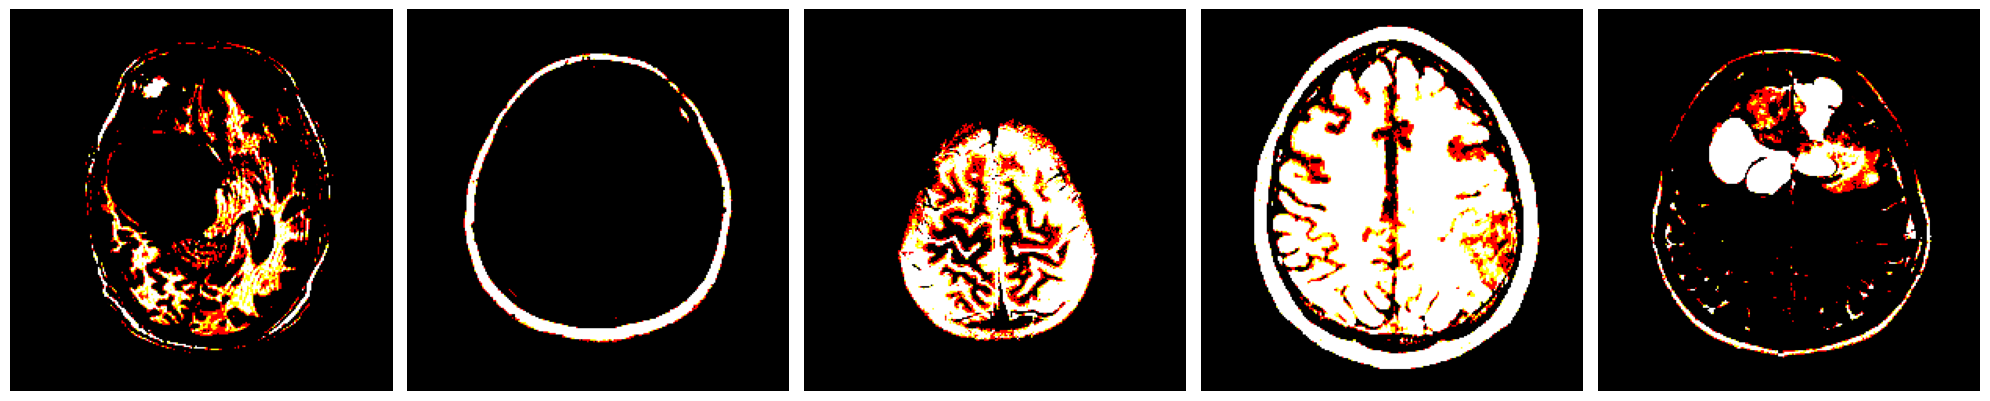

In [15]:
imgs,labels=next(train_data)
plotImages(imgs)


In [16]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.datasets import mnist
from keras.utils import np_utils

In [17]:
model=Sequential([Convolution2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
                 Convolution2D(32,(3,3),activation='relu'),
                 MaxPooling2D(pool_size=(2,2)),
                  Convolution2D(64,(3,3),activation='relu'),
                   MaxPooling2D(pool_size=(2,2)),
                  Flatten(),
                 Dense(128,activation='relu'),
                 Dropout(0.15),
                 Dense(64,activation='relu'),
                  Dropout(0.5),
                  Dense(128,activation='sigmoid'),
                  Dense(64,activation='relu'),
                  Dropout(0.15),
                 Dense(len(cancers),activation='softmax')])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
from keras.layers import BatchNormalization
from keras import regularizers
from keras.optimizers import Adamax
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, input_shape= (224,224,3), pooling= 'max')

model2 = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(len(cancers), activation= 'softmax')
])

model2.summary()

43941136/43941136 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 batch_normalization (BatchN  (None, 1536)             6144      
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 256)               393472    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 44)                11308     
                                                                 
Total params: 11,194,459
Trainable params: 11,104,084
N

In [ ]:
model2.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])
model2.fit(x=train_data,verbose=2,epochs=8)

Epoch 1/8
237/237 - 82s - loss: 6.8950 - accuracy: 0.6123 - 82s/epoch - 344ms/step
Epoch 2/8


In [20]:
p=model2.predict_generator(test_data)
predicts=np.argmax(p,axis=1)

<ipython-input-20-a4d7de300bce>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  p=model2.predict_generator(test_data)


In [21]:
from sklearn.metrics import classification_report


print(classification_report(test_data.classes,predicts,target_names=cancers))

                        precision    recall  f1-score   support

     Glioblastoma T1C+       1.00      0.89      0.94        18
          Granuloma T2       0.00      0.00      0.00         3
      Astrocitoma T1C+       0.84      1.00      0.91        46
  Oligodendroglioma T2       0.83      0.77      0.80        13
      Ganglioglioma T1       1.00      0.75      0.86         4
      Ganglioglioma T2       1.00      0.50      0.67         4
   Meduloblastoma T1C+       0.92      0.85      0.88        13
        Carcinoma T1C+       0.95      0.82      0.88        22
         Schwannoma T2       0.71      0.92      0.80        24
        Neurocitoma T2       0.86      0.95      0.90        20
       Ependimoma T1C+       0.80      0.44      0.57         9
          Carcinoma T2       0.81      0.93      0.87        14
         Meningioma T2       0.83      0.96      0.89        46
     Meduloblastoma T1       1.00      0.50      0.67         4
        Neurocitoma T1       0.96      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
